# Lagrange opt
## Combinations

* Import libraries
* Define the combine function to generate all the possible combination among elements of a matrix
* Init variables

In [1]:
import json
import numpy as np
import matplotlib.pyplot as pl

def combine(*pools):
    result = [[]]
    for pool in pools: #for each scene
        result = [x+[y] for x in result for y in pool] #nested loop
    #add a new column at each loop and the rows required to cover all possibilities
    for prod in result: #return an iterable generator
        yield prod

source = "testscene"
filepath = "rd_results/rd_" + source + ".json"

with open(filepath, 'r') as r:
    i_data = json.load(r)
    
s_rates = np.zeros(shape=(3,5), dtype=int) #TODO: auto
s_dists = np.zeros(shape=(3,5)) #TODO: auto
i = 0 #cfr index
scene_count = 0 #store past scene index

# !! TODO: scene to shot !!
for item in i_data:
    if(item["codec"] == "hevc"):
        scene_index = item["scene_index"]
        if(scene_index != scene_count): #when the shot changes
            i = 0
            scene_count = scene_index
        s_rates[scene_index, i] = item["bitrate"]
        s_dists[scene_index, i] = 100 - item["vmaf"]
        i += 1

t = 6 #TODO compute
rates = np.einsum('ij->i', list(combine(*s_rates))) / t #rate (pesta) vs bitrate (solo somma)
dists = np.einsum('ij->i', list(combine(*s_dists))) / (scene_count + 1) #sum of rows
# media pesata

plot results

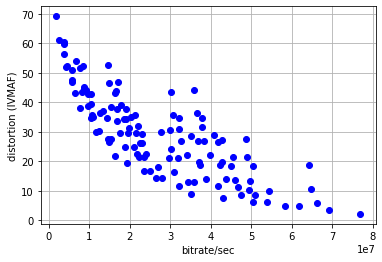

In [2]:
pl.plot(rates, dists, 'bo')
pl.xlabel("bitrate/sec")
pl.ylabel("distortion (IVMAF)")
pl.grid(True)

target_rate = 12000000
target_dist = 100 - 80
opt_dist = True

## Discrete opt with Lagrange
* opt not absolute, but with a target rate? Or also dist?
 1 relative vmafs and rate
 2 absolute slope tangent (calcolando tutti i punti o con stima come fatto)
* is there the need to describe the convex hull? no
 nooo

Bisection algorithm:
Find the initial lambda value
* (coding unit = shot ??) each coding unit is made of a combination of shots coded at different crfs.
 
* why more minima and maxima?
 sequenza no scena
 
* how to compute again TOT Rc and Dc? TOT?
stop when current rate = max rate, otherwise compute again lambda (same formula):
- if it's more new Rr = Rc (Rc è complessivo)
- if it's less new Rl = Rc
verifica alg calcolando tutti punti e differenza